# Primera Entrega Trabajo Final

## Contexto
El dataset llamado marketing.csv cuenta con datos de campañas de marketing y se intentará analizar lo siguiente:

- El desempeño de las campañas de marketing
- El attribution y ROI (Retorno de Inversion) de los diferentes canales de marketing
- Analisis de campañas de AB Testing

## Preguntas o Hipótesis

1. En que fecha hubo mas vistas y mas conversiones?
2. Cual idioma generó más conversiones y más retention
3. Las conversiones tienen relacion con las vistas?
4. Cual idioma tiene mas conversiones y cual tiene mas vistas?
5. Cual grupo de edad ha visto mas las campanas de marketing?
6. Cual canal de marketing genera mas conversiones?

## Exploracion de datos

In [195]:
import pandas as pd
import numpy as np

# Carga de datos y parseo de fechas
marketing = pd.read_csv("./data/marketing.csv", parse_dates=["date_served", "date_subscribed", "date_canceled"])

# .head() muestra las primeras filas del dataframe
print(marketing.head())

      user_id date_served marketing_channel          variant  converted  \
0  a100000029  2018-01-01         House Ads  personalization       True   
1  a100000030  2018-01-01         House Ads  personalization       True   
2  a100000031  2018-01-01         House Ads  personalization       True   
3  a100000032  2018-01-01         House Ads  personalization       True   
4  a100000033  2018-01-01         House Ads  personalization       True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years      2018-01-01   
1            English            English  19-24 years      2018-01-01   
2            English            English  24-30 years      2018-01-01   
3            English            English  30-36 years      2018-01-01   
4            English            English  36-45 years      2018-01-01   

  date_canceled subscribing_channel  is_retained  
0           NaT           House Ads         True  
1           Na

In [196]:
# .info() provides concise summary of a DataFrame's structure and information
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10037 non-null  bool          
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          10037 non-null  bool          
dtypes: bool(2), datetime64[ns](3), object(7)
memory usage: 803.9+ KB
None



## Manipulación de los datos

In [197]:
# convirtiendo datos a tipo de datos correcto
marketing['is_retained'] = marketing['is_retained'].astype('bool')

print(marketing['is_retained'].dtype)


bool


In [198]:
# agregando nueva columna --> channel_code a partir de la columna 'subscribing_channel'

# canales
channel_dict = {"House Ads": 1, "Instagram": 2, "Facebook": 3, "Email": 4, "Push": 5}

# Mapeo de canales
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)


# agregando nueva columna --> is_correct_lang a partir de la columna 'language_displayed' y 'language_preferred'
marketing['is_correct_lang'] = np.where(marketing['language_displayed'] == marketing['language_preferred'], 'Yes', 'No')

# agregando nueva columna --> DoW (Day of Week) a partir de la columna 'date_subscribed'
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

## Análisis exploratorio

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


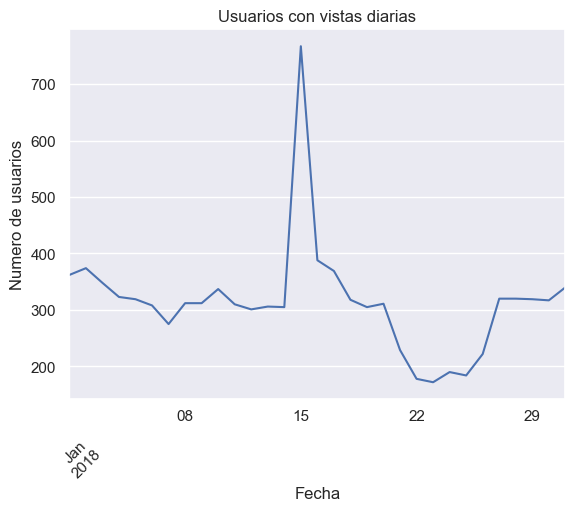

In [317]:
# Usuarios diarios que han visto anuncios
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()
print(daily_users.head())

import matplotlib.pyplot as plt

daily_users.plot()

plt.title('Usuarios con vistas diarias')
plt.ylabel('Numero de usuarios')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.show()

### Metricas comunes para medir desempeño de campañas de marketing
- **Conversion rate:** Cuantos usuarios compraron el producto o se subscribieron?
- **Retention rate:** Cuantos usuarios continuan comprando productos o siguen pagando la subscripcion en un periodo de tiempo

**Formulas:**

![conversion formula](./images/conversion_formula.jpg)

![retention formula](./images/retention_formula.jpg)

In [205]:
total_subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()
total = marketing['user_id'].nunique()
# print(total_subscribers)
conversion_rate = total_subscribers/total
# print(conversion_rate)
# conversion rate en porcentaje
print(round(conversion_rate*100,2), '%')

14.09 %


In [204]:
retention_total = marketing[marketing['is_retained'] == True]['user_id'].nunique()

retention_rate = retention_total/total_subscribers

print(round(retention_rate*100,2), '%')

68.45 %


## Segmentacion

In [216]:
house_ads = marketing[marketing['subscribing_channel'] == 'House Ads']

retained = house_ads[house_ads['is_retained'] == True]['user_id'].nunique()

subscribers = house_ads[house_ads['converted'] == True]['user_id'].nunique()

retention_rate = retained/subscribers

print(round(retention_rate*100,2), '%')


72.48 %


In [218]:
retained = marketing[marketing['is_retained'] == True].groupby(['subscribing_channel'])['user_id'].nunique()
print(retained)

subscribing_channel
Email        103
Facebook     150
House Ads    216
Instagram    168
Push          51
Name: user_id, dtype: int64


In [219]:
# Retention rate por canal
channel_retention_rate = (retained/subscribers)*100

print(channel_retention_rate)

subscribing_channel
Email        34.563758
Facebook     50.335570
House Ads    72.483221
Instagram    56.375839
Push         17.114094
Name: user_id, dtype: float64


### Conversion rate por idioma

In [223]:
# Usuarios que hablan ingles

# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 13.13 %


In [224]:
# Todos los idiomas
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.131260
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


### Conversion diaria

In [235]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()
print(total)

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total

# Reset the index
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index())
# Rename columns
daily_conversion_rate.columns = ['date_served', 'conversion_rate']

print(daily_conversion_rate)

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64
   date_served  conversion_rate
0   2018-01-01         0.099448
1   2018-01-02         0.098930
2   2018-01-03         0.103448
3   2018-01-04         0.108359
4   2018-01-05         0.125392
5   2018-01-06         0.113636
6   2018-01-07         0.141818
7   2018-01-08         0.115385
8   2018-01-09         0.125000
9   2018-01-10         0.118694
10  2018-01-11         0.080645
11  2018-01-12    

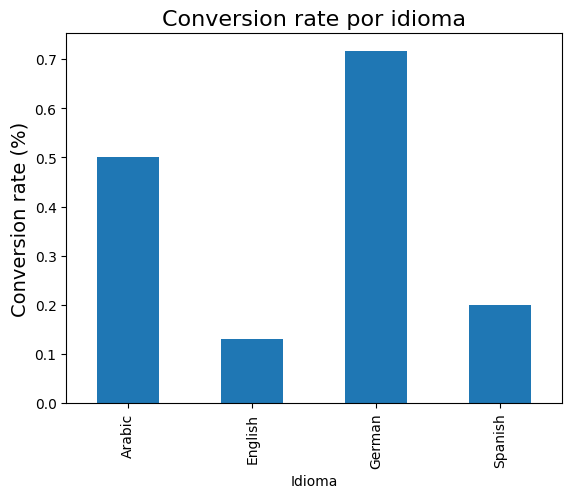

In [236]:
language_conversion_rate.plot(kind='bar')
plt.title('Conversion rate por idioma', size=16)
plt.ylabel('Conversion rate (%)', size=14)
plt.xlabel('Idioma')
plt.show()

### Retention rate diario

In [230]:
total = marketing.groupby(['date_subscribed'])['user_id'].nunique()
retained = marketing[marketing['is_retained'] == True].groupby(['date_subscribed'])['user_id'].nunique()

daily_retention_rate = retained/total
daily_retention_rate = pd.DataFrame(daily_retention_rate.reset_index())

# renombrando columnas
daily_retention_rate.columns = ['date_subscribed', 'retention_rate']
print(daily_retention_rate)

   date_subscribed  retention_rate
0       2018-01-01        0.722222
1       2018-01-02        0.621622
2       2018-01-03        0.675676
3       2018-01-04        0.722222
4       2018-01-05        0.775000
5       2018-01-06        0.594595
6       2018-01-07        0.710526
7       2018-01-08        0.722222
8       2018-01-09        0.750000
9       2018-01-10        0.634146
10      2018-01-11        0.653846
11      2018-01-12        0.739130
12      2018-01-13        0.653846
13      2018-01-14        0.730769
14      2018-01-15        0.571429
15      2018-01-16        0.634615
16      2018-01-17        0.674419
17      2018-01-18        0.733333
18      2018-01-19        0.789474
19      2018-01-20        0.619048
20      2018-01-21        0.666667
21      2018-01-22        0.636364
22      2018-01-23        0.666667
23      2018-01-24        0.739130
24      2018-01-25        0.695652
25      2018-01-26        0.800000
26      2018-01-27        0.714286
27      2018-01-28  

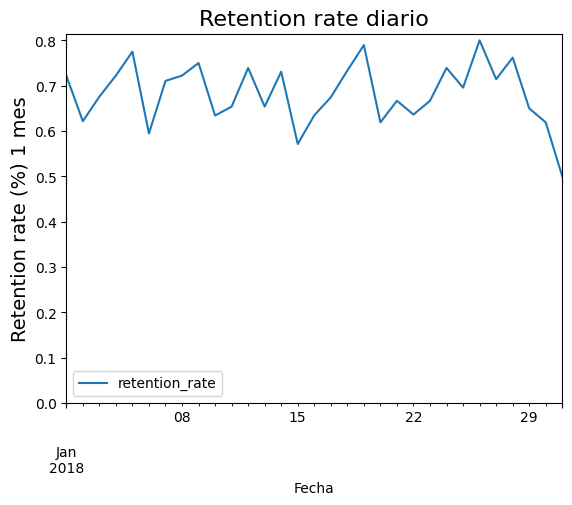

In [232]:
daily_retention_rate.plot(x='date_subscribed', y='retention_rate', kind='line')

plt.title('Retention rate diario', size=16)
plt.ylabel('Retention rate (%) 1 mes', size=14)
plt.xlabel('Fecha')
plt.ylim(0)
plt.show()


## Resultados de las campañas

In [271]:
language = marketing.groupby(['date_served', 'language_preferred'])['user_id'].count()
print(language.head())
language = pd.DataFrame(language.unstack(level=1))
print(language.head())

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
Name: user_id, dtype: int64
language_preferred  Arabic  English  German  Spanish
date_served                                         
2018-01-01             4.0    355.0     5.0     11.0
2018-01-02             4.0    397.0     6.0     10.0
2018-01-03             3.0    374.0     3.0      8.0
2018-01-04             2.0    318.0     2.0     14.0
2018-01-05             1.0    314.0     2.0     14.0


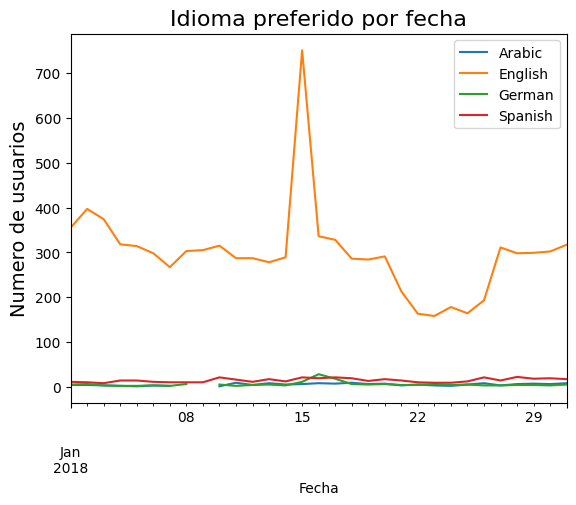

In [256]:
language.plot()
plt.title('Idioma preferido por fecha', size=16)
plt.ylabel('Numero de usuarios', size=14)
plt.xlabel('Fecha')
plt.legend(loc='upper right', labels=language.columns.values)
plt.show()

In [259]:
language_age = marketing.groupby(['age_group', 'language_preferred'])['user_id'].count()
language_age = pd.DataFrame(language_age.unstack(level=1))
print(language_age.head())

language_preferred  Arabic  English  German  Spanish
age_group                                           
0-18 years              19     1421      31       68
19-24 years             26     1560      29       67
24-30 years             19     1442      35       72
30-36 years             19     1251      16       69
36-45 years             19     1260      19       55


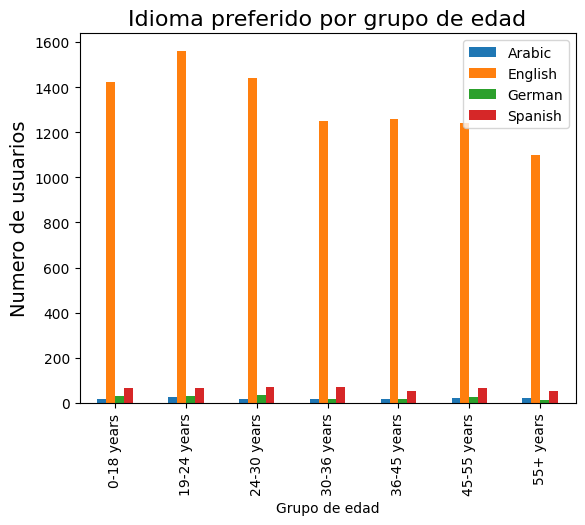

In [260]:
language_age.plot(kind='bar')
plt.title('Idioma preferido por grupo de edad', size=16)
plt.ylabel('Numero de usuarios', size=14)
plt.xlabel('Grupo de edad')
plt.legend(loc='upper right', labels=language_age.columns.values)
plt.show()

             conversion  vistas
date_served                    
2018-01-01           36     362
2018-01-02           37     374
2018-01-03           36     348
2018-01-04           35     323
2018-01-05           40     319


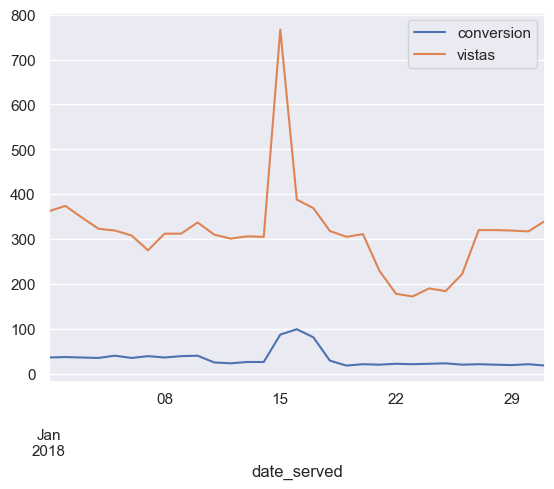

In [296]:
converted_users = marketing[marketing['converted'] == True].groupby('date_served')['user_id'].nunique()
served_users = marketing.groupby('date_served')['user_id'].nunique()
converted_served_users = pd.merge(converted_users, served_users, left_index=True, right_index=True)
converted_served_users.columns = ['conversion', 'vistas']

print(converted_served_users.head())

converted_served_users.plot()
plt.show()

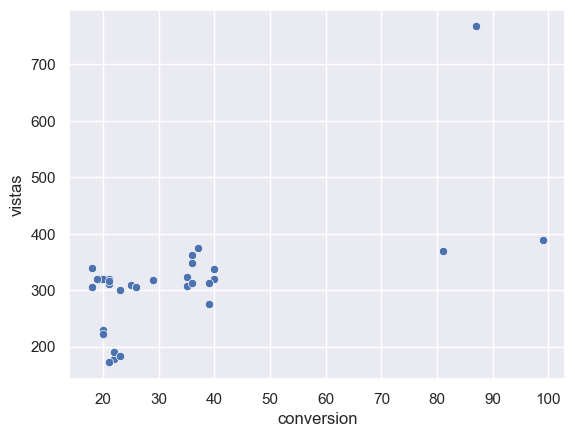

In [297]:
import seaborn as sns

sns.scatterplot(x = converted_served_users['conversion'], y = converted_served_users['vistas']); 
plt.show()


Se puede observar que si existe una tendencia entre más vistas, hay más conversion. Aunque se puede ver que los dias con menor conversion no necesariamente relacionados con la poca cantidad de vistas.
Esto da para seguir analizando los dias con poca conversion.

                           user_id date_served marketing_channel  \
marketing_channel                                                  
Email             354   a100000526  2018-01-01             Email   
                  358   a100000530  2018-01-05             Email   
                  366   a100000538  2018-01-13             Email   
                  370   a100000542  2018-01-17             Email   
                  374   a100000546  2018-01-21             Email   
...                            ...         ...               ...   
Push              1743  a100001346  2018-01-12              Push   
                  1761  a100001355  2018-01-21              Push   
                  1773  a100001361  2018-01-27              Push   
                  1791  a100001370  2018-01-05              Push   
                  1809  a100001379  2018-01-14              Push   

                                variant  converted language_displayed  \
marketing_channel                         

/var/folders/6x/ck8mxqk96v9_bl3dzwkpg7qr0000gn/T/ipykernel_83951/456355700.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conversion_groups = conversion_groups.apply(pd.DataFrame)


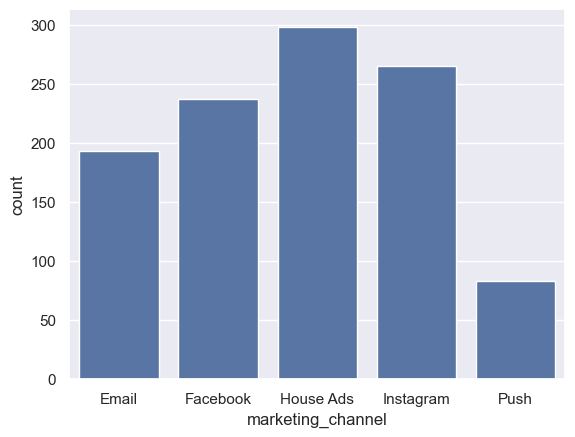

In [316]:
conversion_groups = marketing[marketing['converted'] == True].groupby(['marketing_channel'])
conversion_groups = conversion_groups.apply(pd.DataFrame)

print(conversion_groups)

sns.countplot(x=conversion_groups['marketing_channel'])
plt.show()